Markdown macros

$\newcommand{\I}{\mathrm{i}} 
\newcommand{\E}{\mathrm{e}} 
\newcommand{\D}{\mathop{}\!\mathrm{d}}
\newcommand{\bra}[1]{\langle{#1}|}
\newcommand{\ket}[1]{|{#1}\rangle}
\newcommand{\braket}[1]{\langle{#1}\rangle}
\newcommand{\bm}[1]{\boldsymbol{#1}}$

# Imports

In [1]:
# numpy
import numpy as np

In [2]:
# matplotlib
import matplotlib
import matplotlib.pylab as plt

In [3]:
%matplotlib inline

In [4]:
# sympy
import sympy as sy
sy.init_printing(use_unicode = True)

Bibliographie:

Voir Landau & Lifshitz "Mécanique"

# Cône: rotation

### Calcul des moments

On considère un cône de hauteur $h$ et de rayon de base $a$. Il convient de placer l'origine de coordonnées au sommet du cône, avec $z$ l'axe de symétrie, et donc d'utiliser les coordonnées cylindriques $(r, \phi, z)$:
$$x = r \cos \phi,\; y = r \sin \phi,\; z = z$$
Ici, $\phi \in (0, 2\pi)$, $z \in (0,h)$ et le rayon est $r=0$ pour $z=0$ et $r=a$ pour $z=h$:
$$r = \frac{a}{h} z$$
($z>0$).

On calcule d'abord le volume du cône:
$$\int_0^h \D z \int_0^{az/h} \D r \int_0^{2\pi} \D \phi = \frac{\pi a^2 h}{3}$$
et sa densité $\rho$ en fonction de sa masse $M$:
$$\rho = \frac{3M}{\pi a^2 h}$$

On calcule ensuite la position (sur l'axe $z$) du centre de masse:
$$R = \int_0^h \D z \int_0^{az/h} \D r \int_0^{2\pi} \D \phi \, z = \frac{3 h}{4}$$

Le tenseur d'inertie est diagonal $I_1, I_2, I_3$; on le calcule d'abord par rapport au centre $O$,
\begin{align*}
I_1 &= \int_0^h \D z \int_0^{az/h} \D r \int_0^{2\pi} \D \phi \, (r^2 \cos^2\phi + z^2) \\
I_2 &= \int_0^h \D z \int_0^{az/h} \D r \int_0^{2\pi} \D \phi \, (r^2 \sin^2\phi + z^2) \\
I_3 &= \int_0^h \D z \int_0^{az/h} \D r \int_0^{2\pi} \D \phi \, r^2
\end{align*}
et ensuite on tient compte de la translation au centre de masse $R$, $I_x, I_y, I_z$
$$I_x = I_1 - M R^2 ,\;
I_y = I_2 - M R^2 ,\;
I_z = I_3$$

## Moments d'inertie

On choisit le repère associé au cône est $(x,y,z)$ tel que $z$ est l'axe de symétrie, et la base est parallèle au plan $xy$:
$$I_x = I_y = \frac{3M}{20} \bigg(a^2 + \frac{h^2}{4} \bigg), \; I_z = \frac{3M}{10} a^2$$
Le centre de masse est à une distance $R$ du sommet $O$:
$$R = \frac{3h}{4}$$

In [5]:
a, h, M = sy.symbols("a, h, M", real=True)
r, phi, z = sy.symbols("r, phi, z", real=True)
pi = sy.pi

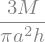

In [6]:
# volume
vol = sy.integrate(sy.integrate(sy.integrate(r, (phi, 0, 2*pi)), (r, 0, a*z/h)), (z,0,h))
rho = M/vol
rho

In [7]:
# fonction intégrale triple:
def integral(f):
    return sy.integrate(sy.integrate(sy.integrate(r * f, (phi, 0, 2*pi)), (r, 0, a*z/h)), (z,0,h))

In [8]:
# centre de masse
R = (rho/M)*integral(z)
R

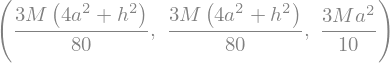

In [9]:
# moments d'inertie (notez que I_x = I_y)
# dans le repère du centre de masse
I_1 = rho * integral(r**2*sy.cos(phi)**2 + z**2)
I_2 = rho * integral(r**2*sy.cos(phi)**2 + z**2)
I_3 = rho * integral(r**2)

I_x = sy.simplify(I_1 - M*R**2)
I_y = sy.simplify(I_2 - M*R**2)
I_z = I_3
(I_x, I_y, I_z)

# Roulement

On considère un cône d'angle $2\alpha$; le centre d'inertie se trouve à une distance $R$ du sommet $O$, origine de coordonnées des repères fixe et mobile.

On appelle $(X,Y,Z)$ le repère fixe et $(x,y,z)$ le repère attaché au cône, avec $z$ son axe de symétrie, $y$ tel qu'il est perpendiculaire à $z$ et à l'axe de rotation $OA$ ($OA$ c'est le segment d'appui du cône sur le plan $XY$); l'axe $x$ se trouve donc dans le plan $OAz$, et il est perpendiculaire à $z$.

On note $\psi$ l'angle entre l'axe $X$ et le segment $OA$.

Vitesse du centre de masse:
$$ V = \dot\psi R \cos \alpha $$

Vitesse angulaire autour de l'axe instantané $OA$:
$$ R \omega \sin \alpha = V, \quad \omega = \dot\psi \cot \alpha$$

Vitesse angulaire $\bm \Omega = \omega \bm n$, avec $\bm n$ la direction de l'axe $OA$:
$$\bm \Omega = (\omega \sin \alpha, 0, \omega \cos \alpha)$$
ou,
$$\bm \Omega = \bigg(\dot\psi \cos \alpha, 0, \dot\psi \frac{\cos^2 \alpha}{\sin \alpha}\bigg)$$

## Moment cinétique

On utilise la formule $\bm L = I_x \Omega_x, I_y \Omega_y, I_z \Omega_z$:
$$\bm L = \begin{pmatrix} \dot\psi\frac{3M}{20} \bigg(R^2 + \frac{h^2}{4} \bigg) \cos \alpha \\ 0 \\ \dot \psi \frac{3M}{10} R^2 \cot \alpha \cos \alpha \end{pmatrix}$$

# Brouillon

In [5]:
phi = sy.symbols("phi", real=True)

In [11]:
sy.integrate(sy.sin(phi)**2, (phi, 0, 2*sy.pi))